# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [1]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [2]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [44]:
# Fetch current BTC price


btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(f"BTC current price: ${btc_price:.2f}")

# Fetch current ETH price
# YOUR CODE HERE!
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"ETH current price: ${eth_price:.2f}")

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

BTC current price: $24824.59
ETH current price: $778.73
The current value of your 1.2 BTC is $29789.50
The current value of your 5.3 ETH is $4127.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [58]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [6]:
# Set Alpaca API key and secret
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-04", tz="Australia/Melbourne").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio = alpaca.get_barset(
        tickers,
        timeframe,
        start=today,
        end=today
).df
# Preview DataFrame
portfolio

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2020-12-03 00:00:00-05:00  117.92  117.98  117.765  117.91  5210910  366.68   

                                                              
                             high    low     close    volume  
time                                                          
2020-12-03 00:00:00-05:00  368.19  365.5  366.6698  52905586

In [56]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio["AGG"]["close"])
spy_close_price = float(portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:.2f}")
print(f"Current SPY closing price: ${spy_close_price:.2f}")

Current AGG closing price: $117.91
Current SPY closing price: $366.67


In [59]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18333.49
The current value of your 200 AGG shares is $23582.00


### Savings Health Analysis

In [74]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
assets = ["Crypto", "Shares"]
df_savings = pd.DataFrame({
        "Amount": [(my_btc_value+my_eth_value), 
                   (my_spy_value+my_eth_value)
                ]},
        index = assets  
)
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,33916.771164
Shares,22460.757887


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

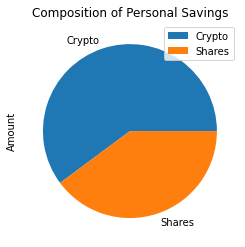

In [68]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [75]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Amount"].sum()
print(f"Total Savings: ${total_savings:.2f}")
# Validate saving health
if total_savings>emergency_fund:
    print(f"Congratulations for having enough money in this fund! You have ${total_savings-emergency_fund:.2f} in excess")
elif total_savings==emergency_fund:
    print(f"Congratulations on reaching your financial goal!")
elif total_savings<emergency_fund:
    print(f"You are ${total_savings-emergency_fund:.2f} away from reaching your goal, keep saving!")

Total Savings: $56377.53
Congratulations for having enough money in this fund! You have $20377.53 in excess


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [4]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [9]:
# Get 5 years' worth of historical data for SPY and AGG
five_year_data = alpaca.get_barset(
        tickers,
        timeframe, 
        start=start_date,
        end=end_date
).df
# Display sample data
five_year_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [95]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirty_years = MCSimulation(
        portfolio_data=five_year_data,
        weights=[.4,.6],
        num_simulation=500,
        num_trading_days=252*30
)

In [87]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [96]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009102,1.004817,1.009256,0.996627,1.001717,1.004113,0.986481,0.994472,1.011551,0.993632,...,0.991220,0.987535,1.005737,1.003969,1.006469,1.014819,1.008205,1.003747,1.012114,0.998610
2,1.010249,0.999203,1.015092,0.988339,0.993334,1.004471,0.996075,0.989696,1.015432,1.002740,...,0.989058,0.988589,1.011583,0.990973,1.011357,1.019758,1.018987,1.015408,1.005486,1.002176
3,1.012243,0.992072,1.011531,0.997058,0.986644,1.011519,0.996143,0.992802,1.011789,1.002192,...,0.989788,0.997716,1.009672,0.980941,1.013726,1.031782,1.023063,1.022965,0.993050,1.001999
4,1.022813,1.004897,1.013736,0.994480,0.993015,1.014999,0.997260,1.005906,1.001406,1.000316,...,0.991309,0.993025,1.003228,0.973779,1.013607,1.037614,1.019185,1.024424,0.994888,1.006437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.530228,12.748391,16.934996,42.232636,6.321169,13.542743,9.668517,11.900751,4.214916,3.897665,...,8.475893,6.159080,10.691740,7.609857,7.488178,4.062641,4.013724,11.754696,2.442017,24.630374
7557,6.500643,12.776440,16.921445,42.239296,6.333070,13.740868,9.763554,12.006896,4.181782,3.903847,...,8.499536,6.176000,10.659175,7.698112,7.526238,4.040345,4.024275,11.756164,2.427882,24.470028
7558,6.415092,12.898986,17.045401,42.313753,6.351685,13.701431,9.767413,11.987754,4.158115,3.953251,...,8.609303,6.181485,10.710256,7.706739,7.531603,4.038478,3.983871,11.751056,2.424704,24.526333
7559,6.464762,12.933934,17.090104,41.983625,6.350180,13.645129,9.717209,11.996956,4.212767,3.975068,...,8.602131,6.250683,10.742919,7.687022,7.447857,4.040935,4.006464,11.855833,2.415041,24.728344


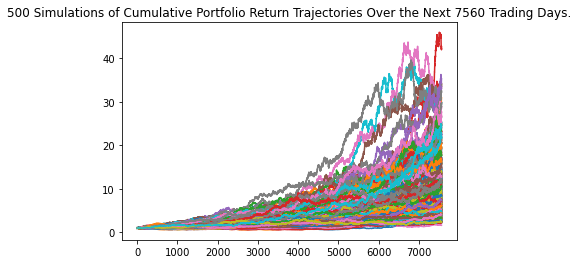

In [97]:
# Plot simulation outcomes
plot_line = MC_thirty_years.plot_simulation()

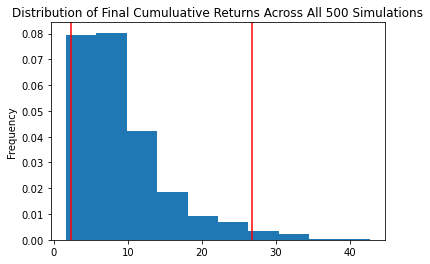

In [98]:
# Plot probability distribution and confidence intervals
plot_distribution = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [99]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_thirty_years.summarize_cumulative_return()
# Print summary statistics
print(summary_stats)

count           500.000000
mean              9.372467
std               6.349623
min               1.633128
25%               4.976975
50%               7.496173
75%              11.820207
max              42.703815
95% CI Lower      2.397409
95% CI Upper     26.740963
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [101]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary_stats[-2]*initial_investment
ci_upper = summary_stats[-1]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47948.19 and $534819.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [102]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = summary_stats[-2]*initial_investment
ci_upper = summary_stats[-1]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71922.28 and $802228.90


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [10]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
        portfolio_data=five_year_data,
        weights=[.2,.8],
        num_simulation=500,
        num_trading_days=252*5
)

In [11]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000975,1.000073,0.996215,1.002669,0.997678,0.996203,1.008350,0.997393,1.016373,0.990815,...,0.990068,1.018310,1.015254,1.010827,1.012430,1.021425,1.001498,1.011543,0.991878,0.999296
2,1.011201,1.000611,1.002096,1.006786,1.007363,0.985332,1.013048,0.983686,1.018012,0.977528,...,0.996222,1.017322,1.039936,1.007075,1.008835,1.017514,0.996045,1.014052,0.991370,0.999854
3,1.017812,1.001753,0.991314,0.988447,1.001556,0.974199,1.017318,1.004511,1.005284,0.972964,...,0.987295,0.995803,1.039780,0.994749,1.005139,1.012970,1.016344,0.996283,0.972416,1.000755
4,1.011051,0.994132,0.992527,0.977082,1.006319,0.978133,1.008571,1.010085,1.017377,0.966958,...,0.971465,0.988608,1.036697,0.995102,1.017387,1.015413,1.034326,0.997856,0.987602,1.003564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.107398,2.149122,2.313120,1.392325,0.926502,1.536803,1.377302,0.716549,0.979585,1.425269,...,1.778085,0.850257,1.426855,2.079844,1.626034,1.013883,2.122204,1.510027,1.348031,1.468716
1257,1.117031,2.178282,2.303853,1.407166,0.928794,1.547960,1.365496,0.713388,0.970989,1.414814,...,1.782572,0.841183,1.444830,2.078552,1.620871,0.992826,2.118874,1.513383,1.333965,1.455901
1258,1.096165,2.155547,2.307177,1.429732,0.931410,1.534267,1.355438,0.714527,0.954609,1.403318,...,1.787536,0.831703,1.435402,2.092037,1.631220,0.990296,2.149171,1.488975,1.337856,1.466120
1259,1.097622,2.129779,2.311603,1.426694,0.919797,1.553751,1.356987,0.717074,0.942775,1.411927,...,1.803175,0.832455,1.438880,2.075726,1.644694,1.006839,2.121453,1.514470,1.330998,1.447490


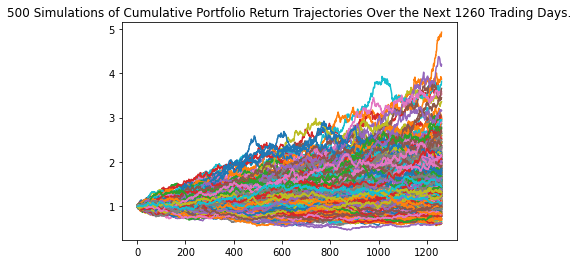

In [12]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

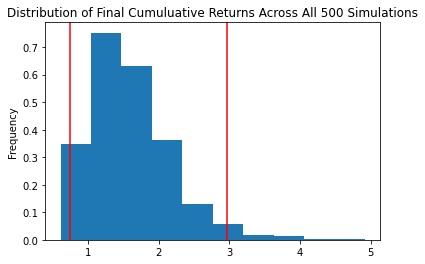

In [13]:
# Plot probability distribution and confidence intervals
distribution_plot_five = MC_five_year.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats = MC_five_year.summarize_cumulative_return()
# Print summary statistics
print(summ_stats)

count           500.000000
mean              1.600511
std               0.590828
min               0.612928
25%               1.219085
50%               1.505073
75%               1.910147
max               4.919562
95% CI Lower      0.745371
95% CI Upper      2.964983
Name: 1260, dtype: float64


In [17]:
# Set initial investment
initial_investment = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = summ_stats[-2]*initial_investment
ci_upper_five = summ_stats[-1]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:.2f} and ${ci_upper_five:.2f}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $37268.55 and $148249.17


### Ten Years Retirement Option

In [19]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
        portfolio_data=five_year_data,
        weights=[.2,.8],
        num_simulation=500,
        num_trading_days=252*10
)

In [20]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993616,1.000984,0.998530,0.999426,1.001930,0.994546,0.994693,0.993605,1.009198,0.994876,...,1.006269,1.010906,1.001851,1.017084,0.992369,1.002246,1.010068,0.987773,0.982511,0.994619
2,0.987188,1.005964,0.994789,0.986416,0.991331,1.000419,0.999538,0.996172,1.001049,1.002116,...,1.005736,1.010223,0.997818,1.028852,0.999920,0.995171,1.010437,0.993565,0.985315,1.000180
3,0.986268,1.020142,0.982356,0.981273,0.980911,0.989526,1.004747,0.986365,1.027321,1.006751,...,1.006203,1.029509,1.002764,1.014125,1.003918,0.985941,1.020485,0.991364,0.985180,0.995485
4,0.981173,1.029058,1.004056,0.975221,0.994525,0.999506,1.006822,1.001046,1.034588,1.006824,...,1.010495,1.048210,0.993941,0.999244,0.991907,0.999654,1.029392,1.001003,0.977760,0.983694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.424911,3.130425,1.691543,2.303963,2.540926,1.806733,0.708529,1.615449,2.938242,3.958499,...,1.552313,1.261389,2.269996,4.102788,4.178366,2.492205,1.307822,1.657319,1.154644,4.123111
2517,1.448855,3.155177,1.697856,2.283846,2.546191,1.805295,0.713936,1.595850,2.941762,4.027419,...,1.557766,1.267111,2.296501,4.150536,4.140171,2.440247,1.308343,1.688065,1.152916,4.175179
2518,1.481791,3.082051,1.696240,2.287377,2.531464,1.794615,0.719260,1.563254,2.962530,4.045279,...,1.568027,1.257340,2.308557,4.185369,4.059155,2.477150,1.309715,1.692879,1.139747,4.151505
2519,1.485818,3.090133,1.673620,2.299125,2.533698,1.800901,0.728223,1.556186,2.934822,4.024523,...,1.568031,1.241100,2.301644,4.087572,4.009219,2.457382,1.302256,1.693798,1.130035,4.121375


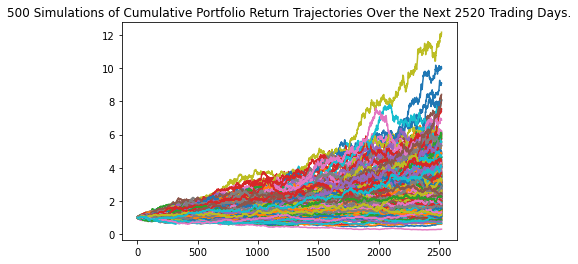

In [21]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

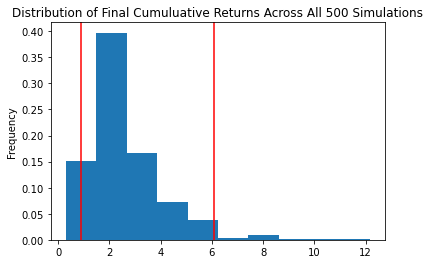

In [22]:
# Plot probability distribution and confidence intervals
distribution_plot_ten = MC_ten_year.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
print(summ_stats)

count           500.000000
mean              2.591705
std               1.465450
min               0.297357
25%               1.642601
50%               2.255497
75%               3.117024
max              12.177957
95% CI Lower      0.890826
95% CI Upper      6.099103
Name: 2520, dtype: float64


In [26]:
# Set initial investment
initial_investment = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = summ_stats[-2]*initial_investment
ci_upper_ten = summ_stats[-1]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:.2f} and ${ci_upper_ten:.2f}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $44541.30 and $304955.14
